In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [7]:
dataset = boston.data 
for name, index in enumerate(boston.feature_names):
    print(index,name)

CRIM 0
ZN 1
INDUS 2
CHAS 3
NOX 4
RM 5
AGE 6
DIS 7
RAD 8
TAX 9
PTRATIO 10
B 11
LSTAT 12


In [8]:
data = dataset[:,12].reshape(-1,1)

In [9]:
np.shape(dataset)

(506, 13)

In [10]:
target=boston.target.reshape(-1,1)

In [11]:
np.shape(target)

(506, 1)

Text(0,0.5,'Cost of house')

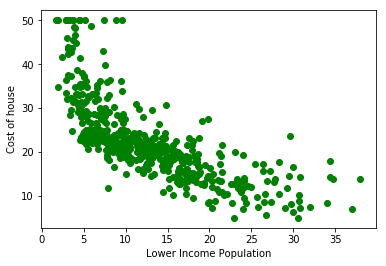

In [14]:
%matplotlib inline 
plt.scatter(data, target, color= "green")
plt.xlabel("Lower Income Population")
plt.ylabel("Cost of house")
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression 
reg=LinearRegression()
reg.fit(data, target)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
pred = reg.predict(data)

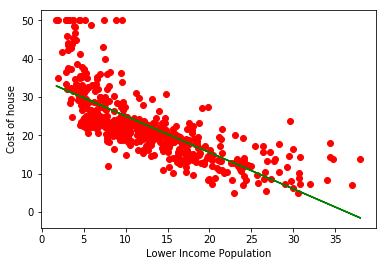

In [18]:
%matplotlib inline 
plt.scatter(data, target, color= "red")
plt.plot(data, pred, color= "green")
plt.xlabel("Lower Income Population")
plt.ylabel("Cost of house")
plt.show()

In [19]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import make_pipeline 

In [21]:
model = make_pipeline(PolynomialFeatures(3),reg)

In [22]:
model.fit(data, target)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [23]:
pred = model.predict(data)

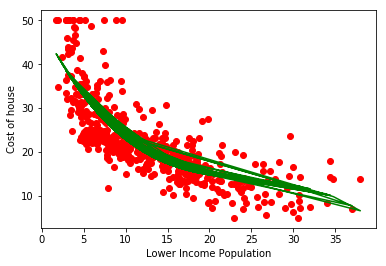

In [24]:
%matplotlib inline 
plt.scatter(data, target, color= "red")
plt.plot(data, pred, color= "green")
plt.xlabel("Lower Income Population")
plt.ylabel("Cost of house")
plt.show()

In [25]:
from sklearn.metrics import r2_score

In [26]:
r2_score(pred,target)

0.47989118102755735